In [27]:
path = 'C:/Users/sabri/Desktop/Visao-Computacional/visao_am/'

In [28]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.densenet import DenseNet121,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import datetime
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
num_classes = 12

In [69]:
modelo_base = DenseNet121(weights='imagenet', include_top=False, input_shape= (224,224,3))

In [32]:
for layer in modelo_base.layers:
    layer.trainable = False

In [33]:
modelo = tf.keras.Sequential(
    [modelo_base,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(num_classes, activation = 'softmax')
    ])
    

In [34]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics = [ 'accuracy'])

In [35]:
log_dir = 'C:/Users/sabri/Desktop/Visao-Computacional/visao_am/FUND_VC_AM/logsDenseNet/fit' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq = 1)

In [36]:
callbacks = [tensorboard_callback]

In [37]:
path = 'C:/Users/sabri/Desktop/Visao-Computacional/visao_am/FUND_VC_AM/'

In [38]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [66]:
train_generator = train_datagen.flow_from_directory(
    path + 'Train',
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical'
)

Found 5863 images belonging to 12 classes.


In [40]:
validation_generator = validation_datagen.flow_from_directory(
    directory=os.path.join(path, 'train'),
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical'
)

Found 5863 images belonging to 12 classes.


In [41]:
test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(path, 'test'),
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical'
)

Found 2888 images belonging to 12 classes.


In [47]:
modelo.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
91/91 [==============================] - 456s 5s/step - loss: 4.8836e-04 - accuracy: 1.0000 - val_loss: 4.1665e-04 - val_accuracy: 1.0000
Epoch 2/10
91/91 [==============================] - 408s 5s/step - loss: 4.4944e-04 - accuracy: 1.0000 - val_loss: 3.8242e-04 - val_accuracy: 1.0000
Epoch 3/10
91/91 [==============================] - 380s 4s/step - loss: 3.9785e-04 - accuracy: 1.0000 - val_loss: 3.6795e-04 - val_accuracy: 1.0000
Epoch 4/10
91/91 [==============================] - 376s 4s/step - loss: 3.6741e-04 - accuracy: 1.0000 - val_loss: 3.2982e-04 - val_accuracy: 1.0000
Epoch 5/10
91/91 [==============================] - 389s 4s/step - loss: 3.3656e-04 - accuracy: 1.0000 - val_loss: 2.9021e-04 - val_accuracy: 1.0000
Epoch 6/10
91/91 [==============================] - 387s 4s/step - loss: 2.9498e-04 - accuracy: 1.0000 - val_loss: 2.6951e-04 - val_accuracy: 1.0000
Epoch 7/10
91/91 [==============================] - 383s 4s/step - loss: 2.7413e-04 - accuracy: 1.0000 - v

In [42]:
modelo = keras.models.load_model('C:/Users/sabri/Desktop/Visao-Computacional/visao_am/FUND_VC_AM/tl_DenseNet121_10_epoch.keras')

In [48]:
test_loss,test_accuracy = modelo.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)
print(f'Acurácia no teste: (test_accuracy)')

45/45 [==============================] - 100s 2s/step - loss: 22.2930 - accuracy: 0.0306
Acurácia no teste: (test_accuracy)


In [49]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [51]:
tensorboard --logdir 'C:/Users/sabri/Desktop/Visao-Computacional/visao_am/FUND_VC_AM/logsDenseNet/'

Reusing TensorBoard on port 6006 (pid 22668), started 1:13:08 ago. (Use '!kill 22668' to kill it.)

In [52]:
modelo.save(path + 'tl_DenseNet121_10_epoch.keras')

Inferência 

In [74]:
class_indices = train_generator.class_indices
print(class_indices)


{'CarrosPequenos': 0, 'Pessoas_oculos': 1, 'barba': 2, 'bicicletas': 3, 'cabeloEscuro': 4, 'cabelo_claro': 5, 'carro_grande': 6, 'helicopteros': 7, 'moto': 8, 'pessoas_capacete': 9, 'pessoas_carecas': 10, 'ruas_alagadas': 11}


In [82]:
def predicao_img(imagem, modelo):
    img = image.load_img(imagem, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predicoes = modelo.predict(img_array)
    classes =['CarrosPequenos', 'Pessoas_oculos', 'barba', 'bicicletas', 'cabeloEscuro', 'cabelo_claro', 'carro_grande', \
              'helicopteros', 'moto', 'pessoas_capacete', 'pessoas_carecas', 'ruas_alagadas']
    classe_predita = classes[np.argmax(predicoes[0])]
    
    return classe_predita, img

In [83]:
dir_origem = 'C:/Users/sabri/Desktop/Visao-Computacional/visao_am/FUND_VC_AM/amostras/'

In [84]:
amostras = [ os.path.join(dir_origem, f) \
           for f in os.listdir(dir_origem) \
           if f.endswith(( '.png', '.jpg', '.jfif', '.jpeg'))]

1/1 [==============================] - 0s 91ms/step


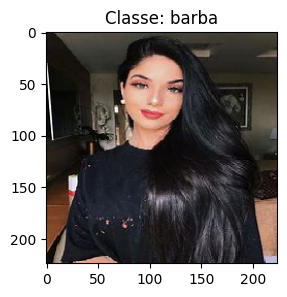

1/1 [==============================] - 0s 106ms/step


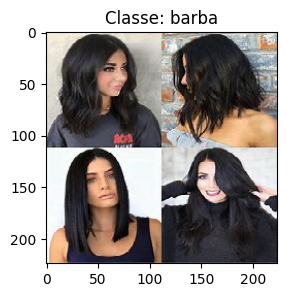

1/1 [==============================] - 0s 161ms/step


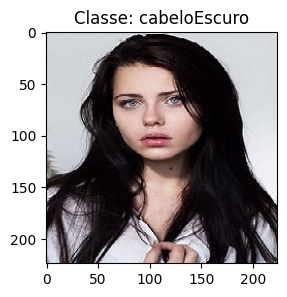

1/1 [==============================] - 0s 106ms/step


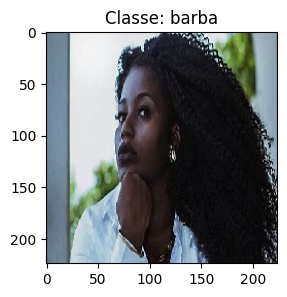

1/1 [==============================] - 0s 117ms/step


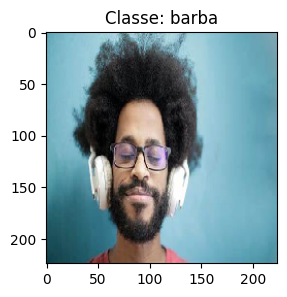

1/1 [==============================] - 0s 93ms/step


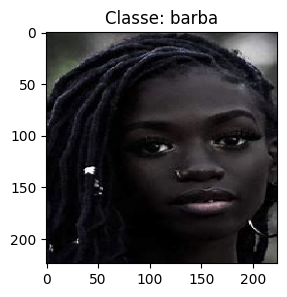

1/1 [==============================] - 0s 116ms/step


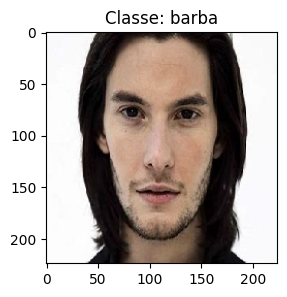

In [85]:
for amostra in amostras:
    classe_predita, img = predicao_img(amostra, modelo)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.title(f'Classe: {classe_predita}')
    plt.show()